In [1]:
# Imports
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import requests
import csv
from tqdm import tqdm

In [2]:
# For data preprocessing and analysis part
data = pd.read_csv('TTM.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.620000,10.640000,10.510000,10.600000,9.197446,136500
1,2005-07-14,10.500000,10.500000,10.330000,10.390000,9.015231,136000
2,2005-07-15,10.500000,10.650000,10.500000,10.550000,9.154059,158700
3,2005-07-18,10.720000,10.740000,10.660000,10.720000,9.301566,88000
4,2005-07-19,10.800000,11.030000,10.800000,10.990000,9.535840,128000
...,...,...,...,...,...,...,...
4274,2022-07-06,26.180000,26.570000,26.129999,26.420000,26.420000,623700
4275,2022-07-07,27.200001,27.879999,27.200001,27.700001,27.700001,715700
4276,2022-07-08,27.750000,28.090000,27.690001,27.900000,27.900000,355300
4277,2022-07-11,27.450001,27.540001,27.219999,27.260000,27.260000,341700


In [3]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28912\2985681012.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.62,10.64,10.51,10.60,9.197446,136500
1,2005-07-14,10.50,10.50,10.33,10.39,9.015231,136000
2,2005-07-15,10.50,10.65,10.50,10.55,9.154059,158700
3,2005-07-18,10.72,10.74,10.66,10.72,9.301566,88000
4,2005-07-19,10.80,11.03,10.80,10.99,9.535840,128000


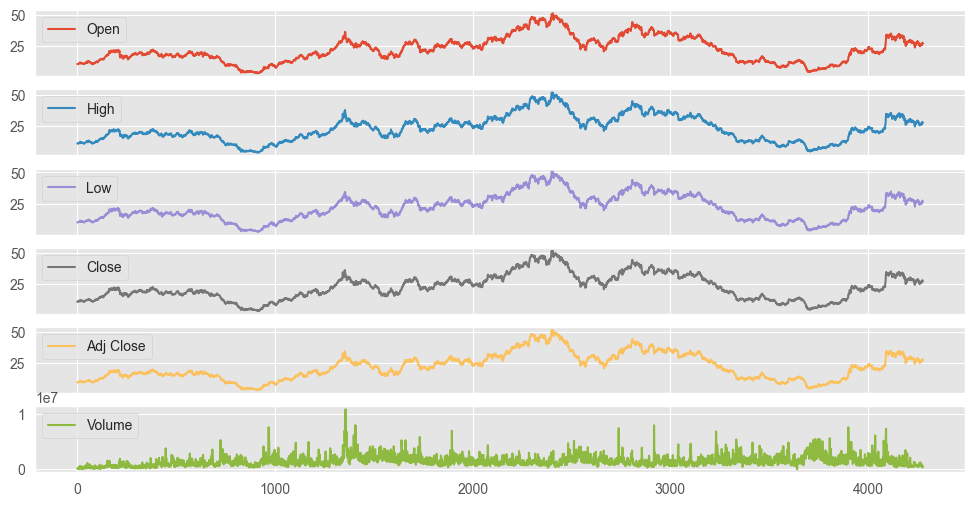

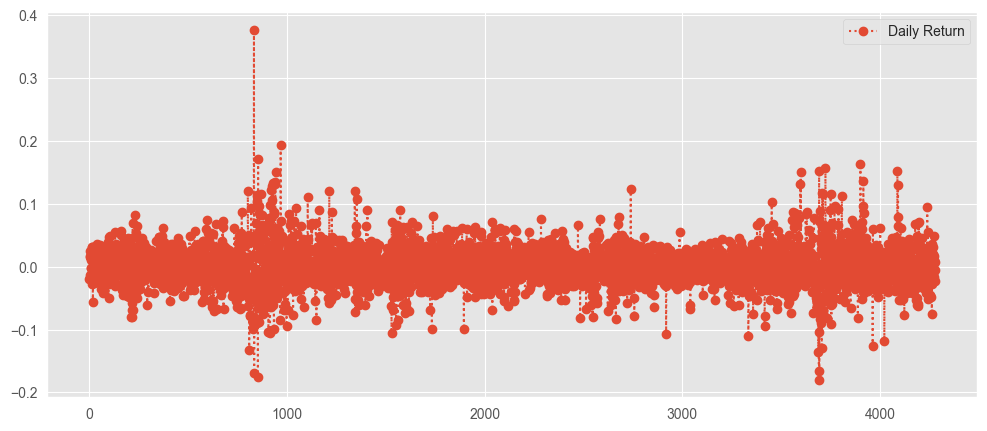

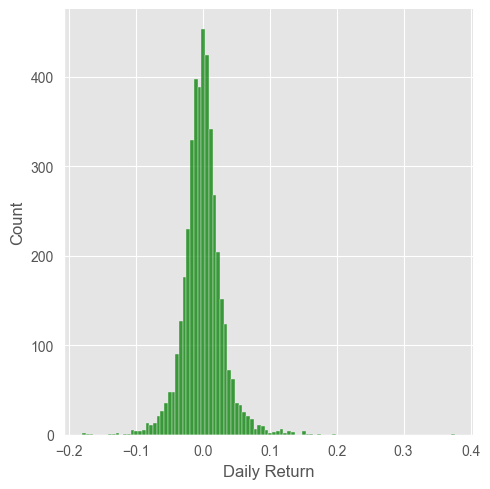

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28912\2462714608.py:34: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


            Date       Open       High        Low      Close  Adj Close  \
0     2005-07-13  10.620000  10.640000  10.510000  10.600000   9.197446   
1     2005-07-14  10.500000  10.500000  10.330000  10.390000   9.015231   
2     2005-07-15  10.500000  10.650000  10.500000  10.550000   9.154059   
3     2005-07-18  10.720000  10.740000  10.660000  10.720000   9.301566   
4     2005-07-19  10.800000  11.030000  10.800000  10.990000   9.535840   
...          ...        ...        ...        ...        ...        ...   
4274  2022-07-06  26.180000  26.570000  26.129999  26.420000  26.420000   
4275  2022-07-07  27.200001  27.879999  27.200001  27.700001  27.700001   
4276  2022-07-08  27.750000  28.090000  27.690001  27.900000  27.900000   
4277  2022-07-11  27.450001  27.540001  27.219999  27.260000  27.260000   
4278  2022-07-12  26.940001  27.420000  26.860001  27.129999  27.129999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     136500        2

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

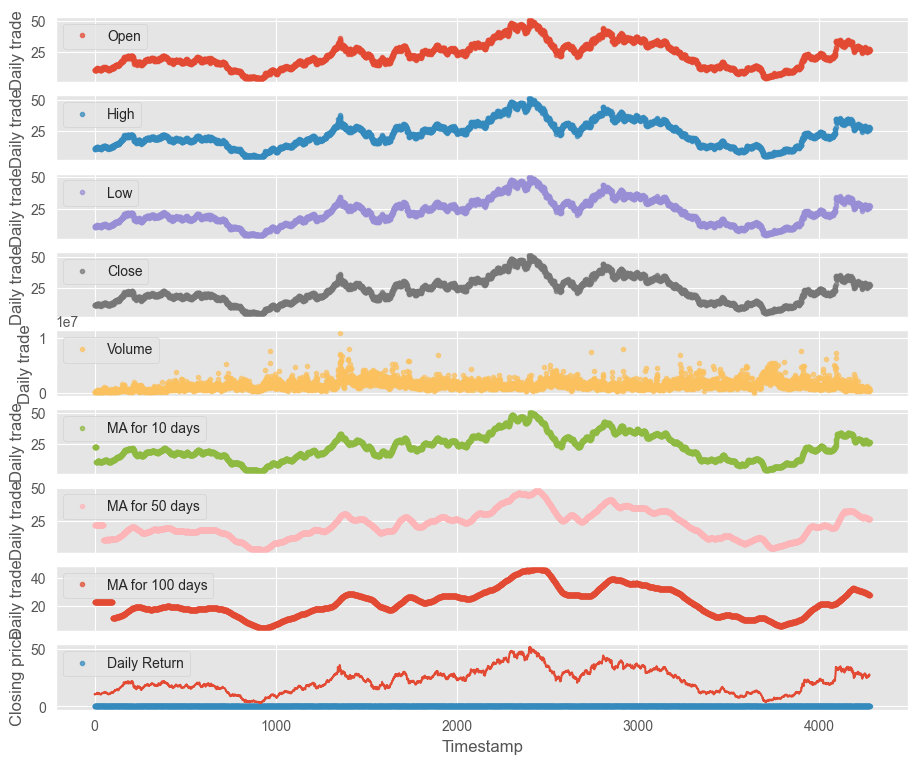

In [4]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()

data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

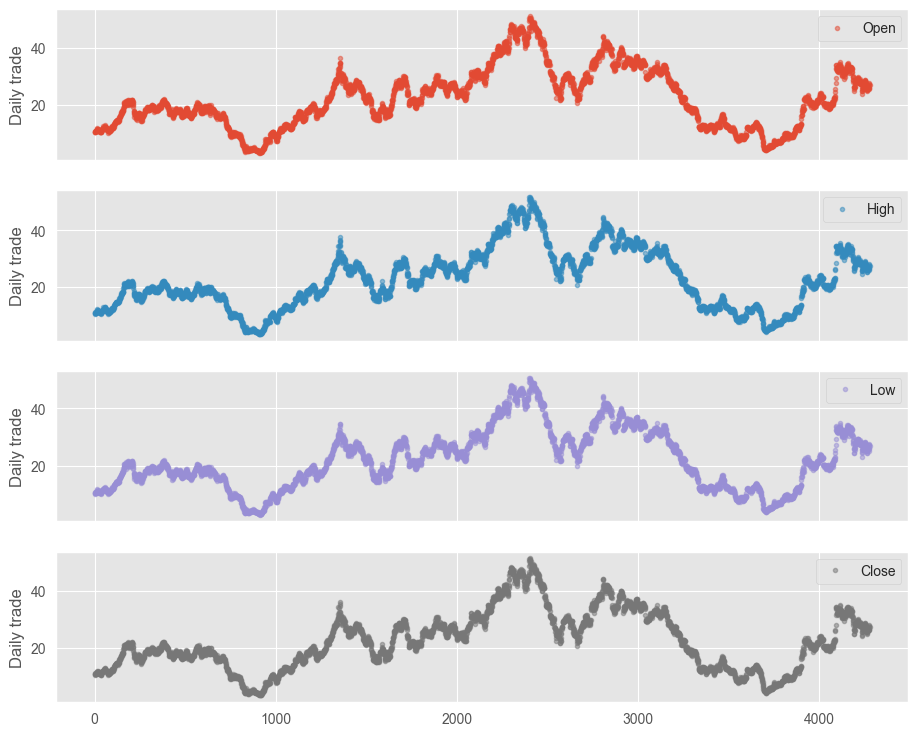

In [5]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date       Open       High        Low      Close  Adj Close  \
0     2005-07-13  10.620000  10.640000  10.510000  10.600000   9.197446   
1     2005-07-14  10.500000  10.500000  10.330000  10.390000   9.015231   
2     2005-07-15  10.500000  10.650000  10.500000  10.550000   9.154059   
3     2005-07-18  10.720000  10.740000  10.660000  10.720000   9.301566   
4     2005-07-19  10.800000  11.030000  10.800000  10.990000   9.535840   
...          ...        ...        ...        ...        ...        ...   
4274  2022-07-06  26.180000  26.570000  26.129999  26.420000  26.420000   
4275  2022-07-07  27.200001  27.879999  27.200001  27.700001  27.700001   
4276  2022-07-08  27.750000  28.090000  27.690001  27.900000  27.900000   
4277  2022-07-11  27.450001  27.540001  27.219999  27.260000  27.260000   
4278  2022-07-12  26.940001  27.420000  26.860001  27.129999  27.129999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     136500        2

,count,mean,std,min,25%,50%,75%,max
Open,4279.0,2.237445e+01,10.299331,3.170000,14.695000,2.099000e+01,2.935500e+01,5.126000e+01
High,4279.0,2.261316e+01,10.374618,3.410000,14.900000,2.123000e+01,2.972000e+01,5.180000e+01
Low,4279.0,2.210889e+01,10.228782,3.050000,14.505000,2.079000e+01,2.910000e+01,5.065000e+01
Close,4279.0,2.236894e+01,10.297576,3.140000,14.725000,2.103000e+01,2.940500e+01,5.147000e+01
Adj Close,4279.0,2.180599e+01,10.523917,2.907577,13.620653,2.040992e+01,2.913283e+01,5.144851e+01
Volume,4279.0,1.477393e+06,939806.962446,0.000000,859950.000000,1.268200e+06,1.866100e+06,1.085910e+07
MA for 10 days,4279.0,2.237635e+01,10.261658,3.431000,14.939500,2.109000e+01,2.939800e+01,5.049200e+01
MA for 50 days,4279.0,2.240954e+01,10.102053,3.923000,15.077400,2.106560e+01,2.923080e+01,4.794400e+01
MA for 100 days,4279.0,2.244370e+01,9.891112,4.185200,15.286750,2.151730e+01,2.835625e+01,4.625290e+01
Daily Return,4279.0,6.706601e-04,0.030190,-0.179845,-0.014925,0.000000e+00,1.499271e-02,3.764706e-01


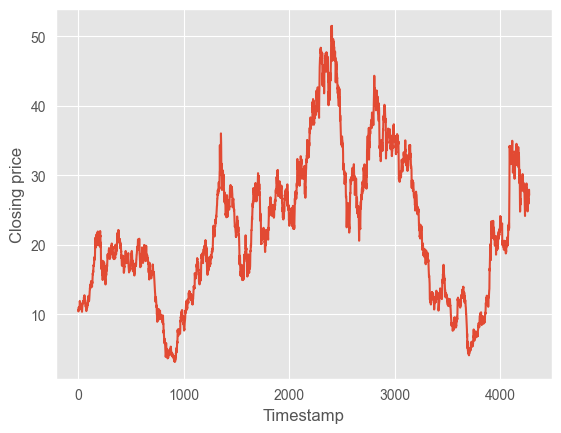

In [6]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [7]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [8]:
print(train_X.shape, test_X.shape)

(3341, 1, 100, 1) (836, 1, 100, 1)


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# CNN layers
model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='tanh', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

# LSTM layers
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =True)

Epoch 1/100
53/53 [==============================] - 14s 66ms/step - loss: 0.0480 - mse: 0.0480 - mae: 0.1458 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae: 0.0860
Epoch 2/100
53/53 [==============================] - 2s 29ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0804 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0721
Epoch 3/100
53/53 [==============================] - 2s 29ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0663 - val_loss: 0.0123 - val_mse: 0.0123 - val_mae: 0.0608
Epoch 4/100
53/53 [==============================] - 2s 35ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0620 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0526
Epoch 5/100
53/53 [==============================] - 2s 29ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0577 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0498
Epoch 6/100
53/53 [==============================] - 2s 31ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0559 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0483
Epoch 7/100
53/

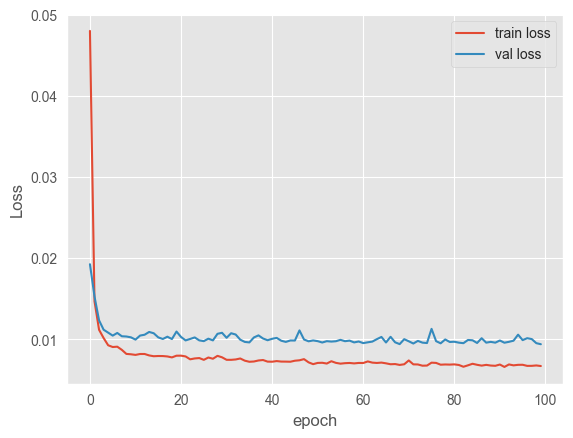

In [10]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

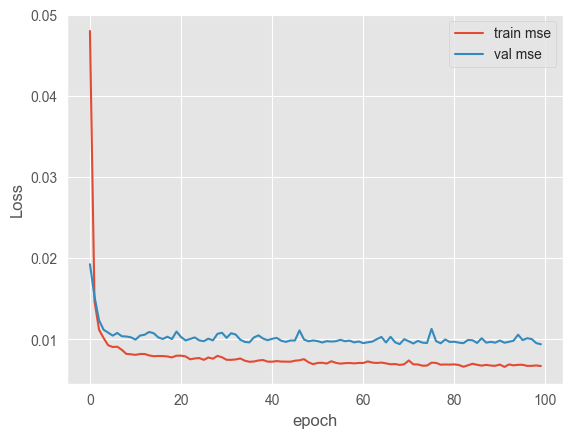

In [11]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

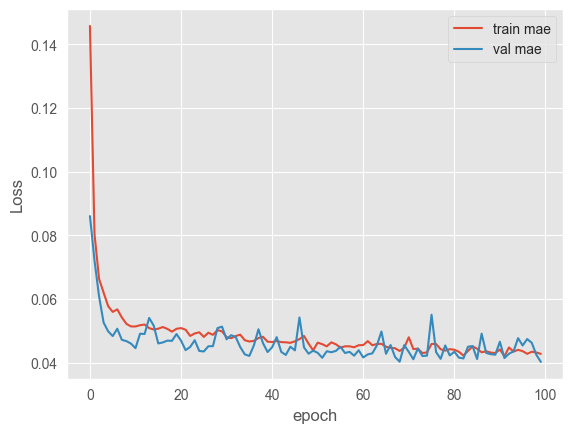

In [12]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [13]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 100, 32)       64        
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 50, 32)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 48, 128)       12416     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 24, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 22, 64)        2

In [14]:
model.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 10ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0402


[0.009386934340000153, 0.009386934340000153, 0.04022286459803581]

In [15]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
yhat_probs = model.predict(test_X, verbose=0)
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.947373
R2 Score: 0.947373
Max Error: 1.107347


27/27 [==============================] - 0s 6ms/step


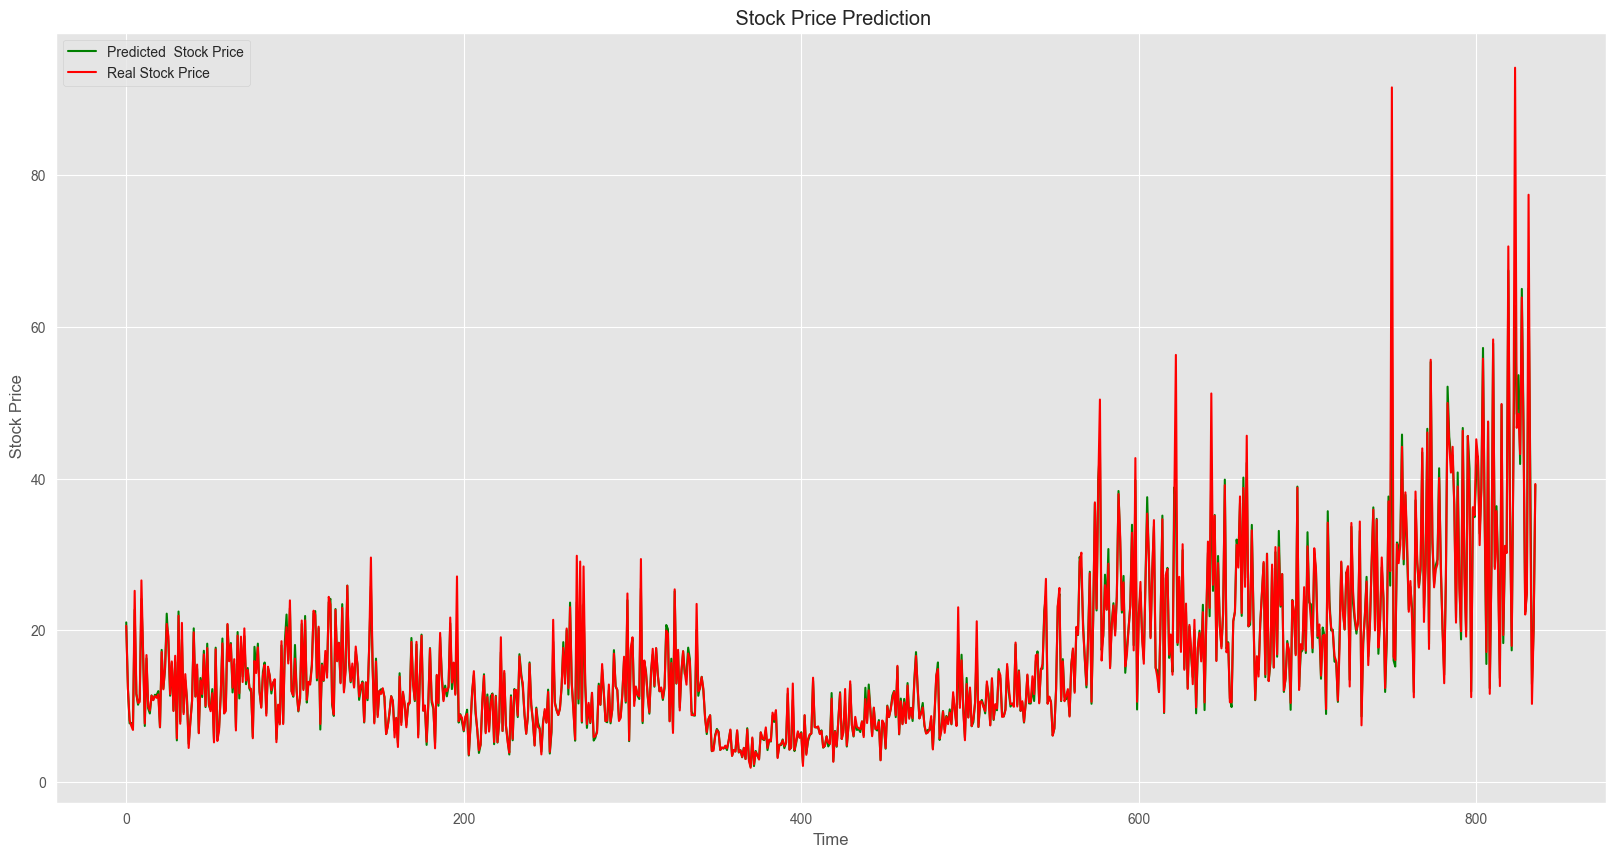

In [16]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.figure(figsize=(20,10))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In this part, the model is saved and loaded back again. Then, it's made to train again but with different data to check it's loss and prediction

In [17]:
model.save("model.h5")

In [18]:
new_model = tf.keras.models.load_model("./model.h5")

In [19]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 100, 32)       64        
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 50, 32)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 48, 128)       12416     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 24, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 22, 64)        2

In [20]:
data2 = pd.read_csv('TTM.csv')
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

           Open       High        Low      Close  Adj Close  Volume
0     10.620000  10.640000  10.510000  10.600000   9.197446  136500
1     10.500000  10.500000  10.330000  10.390000   9.015231  136000
2     10.500000  10.650000  10.500000  10.550000   9.154059  158700
3     10.720000  10.740000  10.660000  10.720000   9.301566   88000
4     10.800000  11.030000  10.800000  10.990000   9.535840  128000
...         ...        ...        ...        ...        ...     ...
4274  26.180000  26.570000  26.129999  26.420000  26.420000  623700
4275  27.200001  27.879999  27.200001  27.700001  27.700001  715700
4276  27.750000  28.090000  27.690001  27.900000  27.900000  355300
4277  27.450001  27.540001  27.219999  27.260000  27.260000  341700
4278  26.940001  27.420000  26.860001  27.129999  27.129999  506800

[4279 rows x 6 columns]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28912\4138226894.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.fillna(data.mean(), inplace=True)


3341
836


In [21]:
df2

,Open,High,Low,Close,Adj Close,Volume
0,10.620000,10.640000,10.510000,10.600000,9.197446,136500
1,10.500000,10.500000,10.330000,10.390000,9.015231,136000
2,10.500000,10.650000,10.500000,10.550000,9.154059,158700
3,10.720000,10.740000,10.660000,10.720000,9.301566,88000
4,10.800000,11.030000,10.800000,10.990000,9.535840,128000
...,...,...,...,...,...,...
4274,26.180000,26.570000,26.129999,26.420000,26.420000,623700
4275,27.200001,27.879999,27.200001,27.700001,27.700001,715700
4276,27.750000,28.090000,27.690001,27.900000,27.900000,355300
4277,27.450001,27.540001,27.219999,27.260000,27.260000,341700


In [22]:
model.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 6ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0476


[0.008941818960011005, 0.008941818960011005, 0.04764885827898979]

27/27 [==============================] - 0s 5ms/step


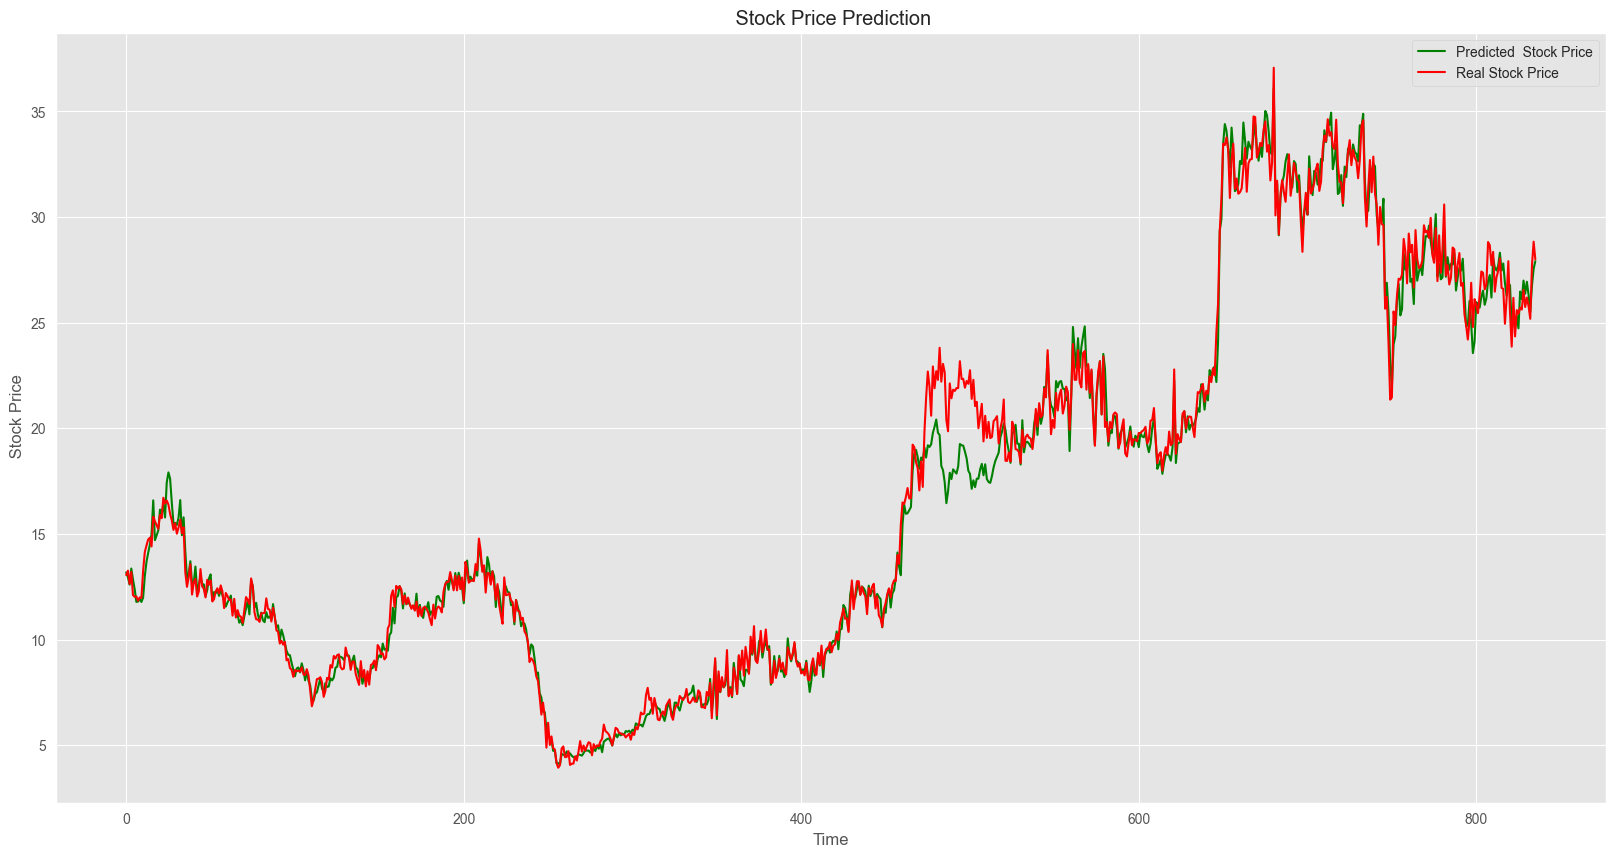

In [23]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.figure(figsize=(20,10))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()